In [1]:
import os
import random
import shutil
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models  
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint


In [2]:
# Path to the main dataset folder
dataset_path = "/Users/rajendarbore/Desktop/Pokemon Image Data/PokemonImagesData"
train_dataset = "/Users/rajendarbore/Desktop/Pokemon Image Data/train"
val_dataset = "/Users/rajendarbore/Desktop/Pokemon Image Data/val"
test_dataset = "/Users/rajendarbore/Desktop/Pokemon Image Data/test"


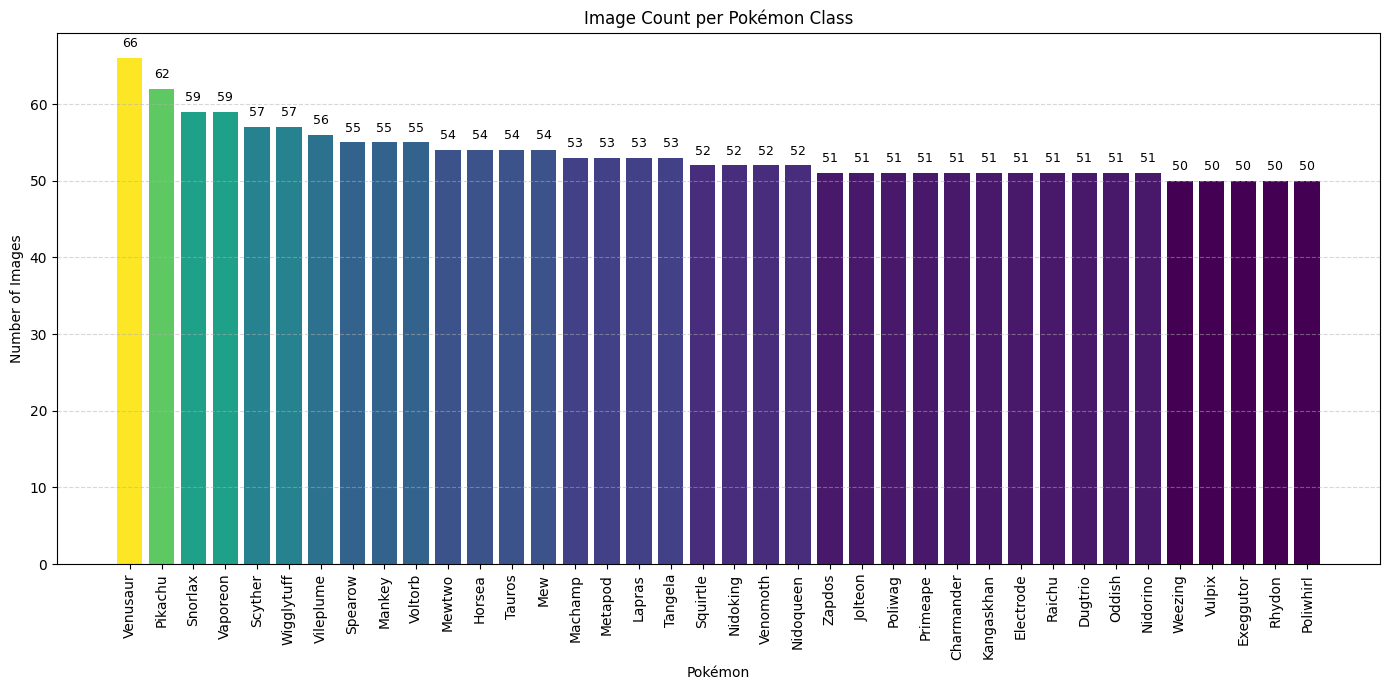

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Get image counts
class_counts = {folder: len(os.listdir(os.path.join(dataset_path, folder))) 
                for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))}

# Sort classes by count
sorted_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))
classes = list(sorted_counts.keys())
counts = list(sorted_counts.values())

# Create color gradient
norm = plt.Normalize(min(counts), max(counts))
colors = cm.viridis(norm(counts))

# Plot
plt.figure(figsize=(14, 7))
bars = plt.bar(classes, counts, color=colors)

# Add count labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(yval), 
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=90)
plt.title('Image Count per Pokémon Class')
plt.xlabel('Pokémon')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [4]:
from PIL import Image
import os

test_dir = "/Users/rajendarbore/Desktop/Pokemon Image Data/test"

for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        try:
            img = Image.open(file_path)
            img.verify()  # Check if image can be opened
        except Exception as e:
            print(f"Corrupt image removed: {file_path}")
            os.remove(file_path)


KeyboardInterrupt: 

In [5]:
import os
from PIL import Image

# Path to your Pokémon images dataset
dataset_directory = "/Users/rajendarbore/Desktop/Pokemon Image Data/PokemonImagesData"

# Valid image extensions
valid_extensions = ('.png', '.jpg', '.jpeg', '.JPG', '.PNG', '.JPEG')

# Function to check if an image is valid
def is_valid_image(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verify the image file is not corrupted
        return True
    except (IOError, SyntaxError):
        return False

# Check the contents of the directory
print(f"Directory contents: {os.listdir(dataset_directory)}")

# Use os.walk to check all subdirectories and files
image_files = []
for root, dirs, files in os.walk(dataset_directory):
    for file in files:
        if file.lower().endswith(valid_extensions) and not file.startswith('.'):
            image_files.append(os.path.join(root, file))

# Check if each image file is valid
valid_images = []
invalid_images = []

for image_file in image_files:
    if is_valid_image(image_file):
        valid_images.append(image_file)
    else:
        invalid_images.append(image_file)

# Print the results
print(f"Total images found: {len(image_files)}")
print(f"Valid images: {len(valid_images)}")
print(f"Invalid images: {len(invalid_images)}")

# print invalid images if any
if invalid_images:
    print("Invalid images:")
    for img in invalid_images:
        print(img)
else:
    print("All images are valid.")


Directory contents: ['Zapdos', 'Jolteon', 'Poliwag', 'Machamp', 'Venusaur', 'Vileplume', 'Spearow', 'Snorlax', 'Scyther', 'Primeape', 'Mankey', 'Voltorb', 'Squirtle', 'Pikachu', 'Charmander', 'Vaporeon', 'Kangaskhan', 'Metapod', 'Electrode', 'Raichu', 'Mewtwo', 'Weezing', 'Wigglytuff', 'Vulpix', 'Dugtrio', 'Horsea', 'Oddish', 'Lapras', 'Exeggutor', 'Tauros', 'Nidoking', 'Tangela', 'Mew', 'Venomoth', 'Rhydon', 'Nidorino', 'Poliwhirl', 'Nidoqueen']


KeyboardInterrupt: 

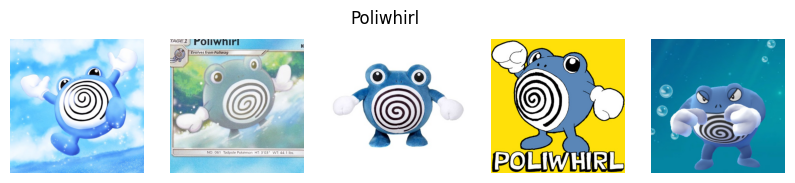

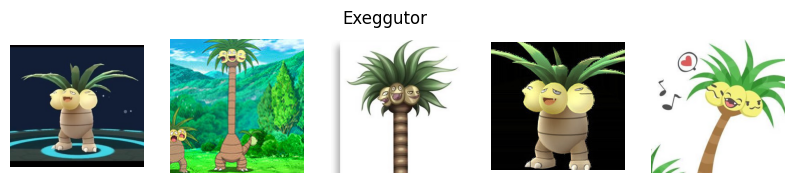

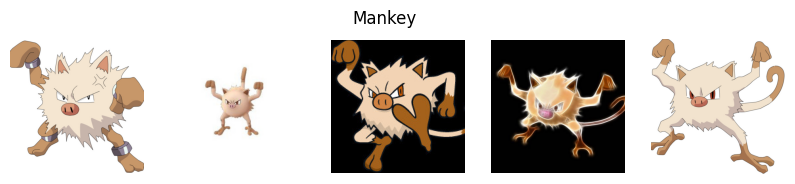

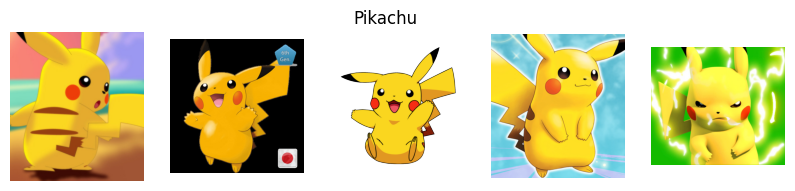

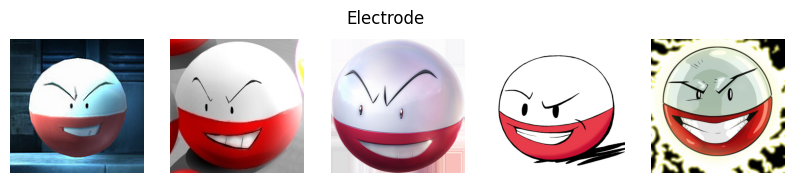

In [4]:
import random
from PIL import Image

n_classes_to_display = 5
n_images_per_class = 5

sample_classes = random.sample(list(class_counts.keys()), n_classes_to_display)

for cls in sample_classes:
    folder = os.path.join(dataset_path, cls)
    images = random.sample(os.listdir(folder), n_images_per_class)
    fig, axs = plt.subplots(1, n_images_per_class, figsize=(10, 2))
    fig.suptitle(cls)
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()


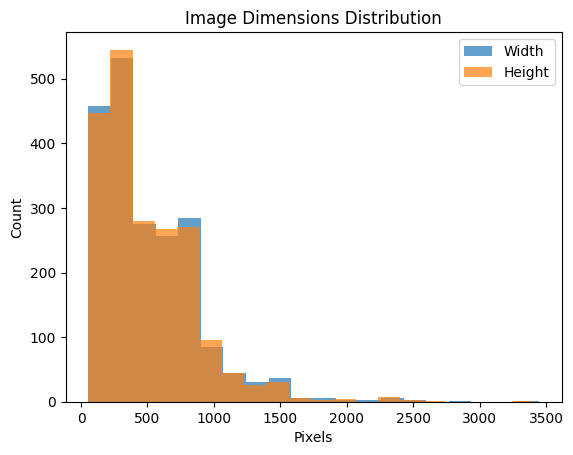

In [5]:
from PIL import Image

widths, heights = [], []

for cls in class_counts:
    folder = os.path.join(dataset_path, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path)
            widths.append(img.size[0])
            heights.append(img.size[1])
        except:
            continue

plt.hist(widths, bins=20, alpha=0.7, label='Width')
plt.hist(heights, bins=20, alpha=0.7, label='Height')
plt.title("Image Dimensions Distribution")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.legend()
plt.show()


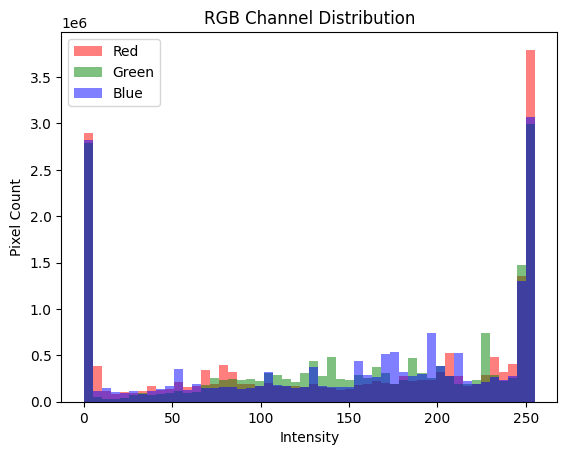

In [6]:
import numpy as np

reds, greens, blues = [], [], []

for cls in random.sample(list(class_counts.keys()), 5):
    folder = os.path.join(dataset_path, cls)
    for img_name in random.sample(os.listdir(folder), 10):  # limit to speed up
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path).convert('RGB')
        img_np = np.array(img)
        reds.extend(img_np[:, :, 0].flatten())
        greens.extend(img_np[:, :, 1].flatten())
        blues.extend(img_np[:, :, 2].flatten())

plt.hist(reds, bins=50, alpha=0.5, label='Red', color='r')
plt.hist(greens, bins=50, alpha=0.5, label='Green', color='g')
plt.hist(blues, bins=50, alpha=0.5, label='Blue', color='b')
plt.legend()
plt.title("RGB Channel Distribution")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()


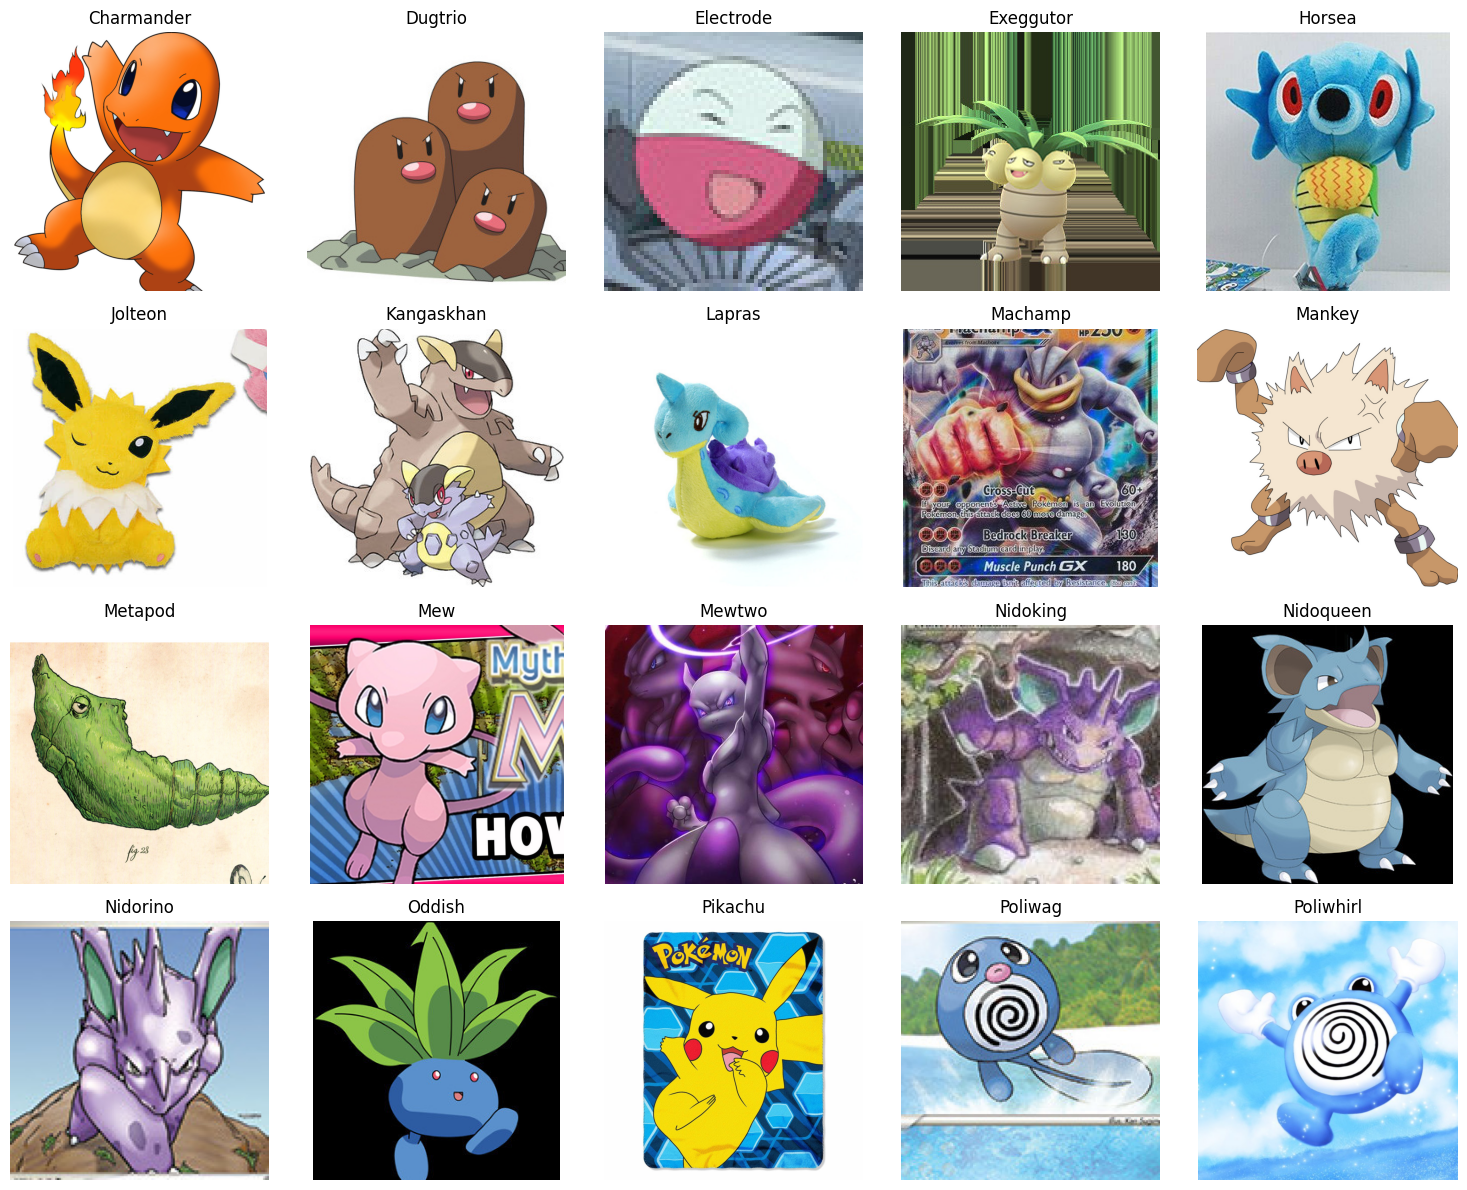

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # Adjust grid size based on number of classes
axs = axs.flatten()

folders = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
folders = sorted(folders)  # Sort alphabetically for consistency

for ax, folder in zip(axs, folders):
    img_path = os.path.join(dataset_path, folder, os.listdir(os.path.join(dataset_path, folder))[0])
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(folder)
    ax.axis('off')

plt.tight_layout()
plt.show()


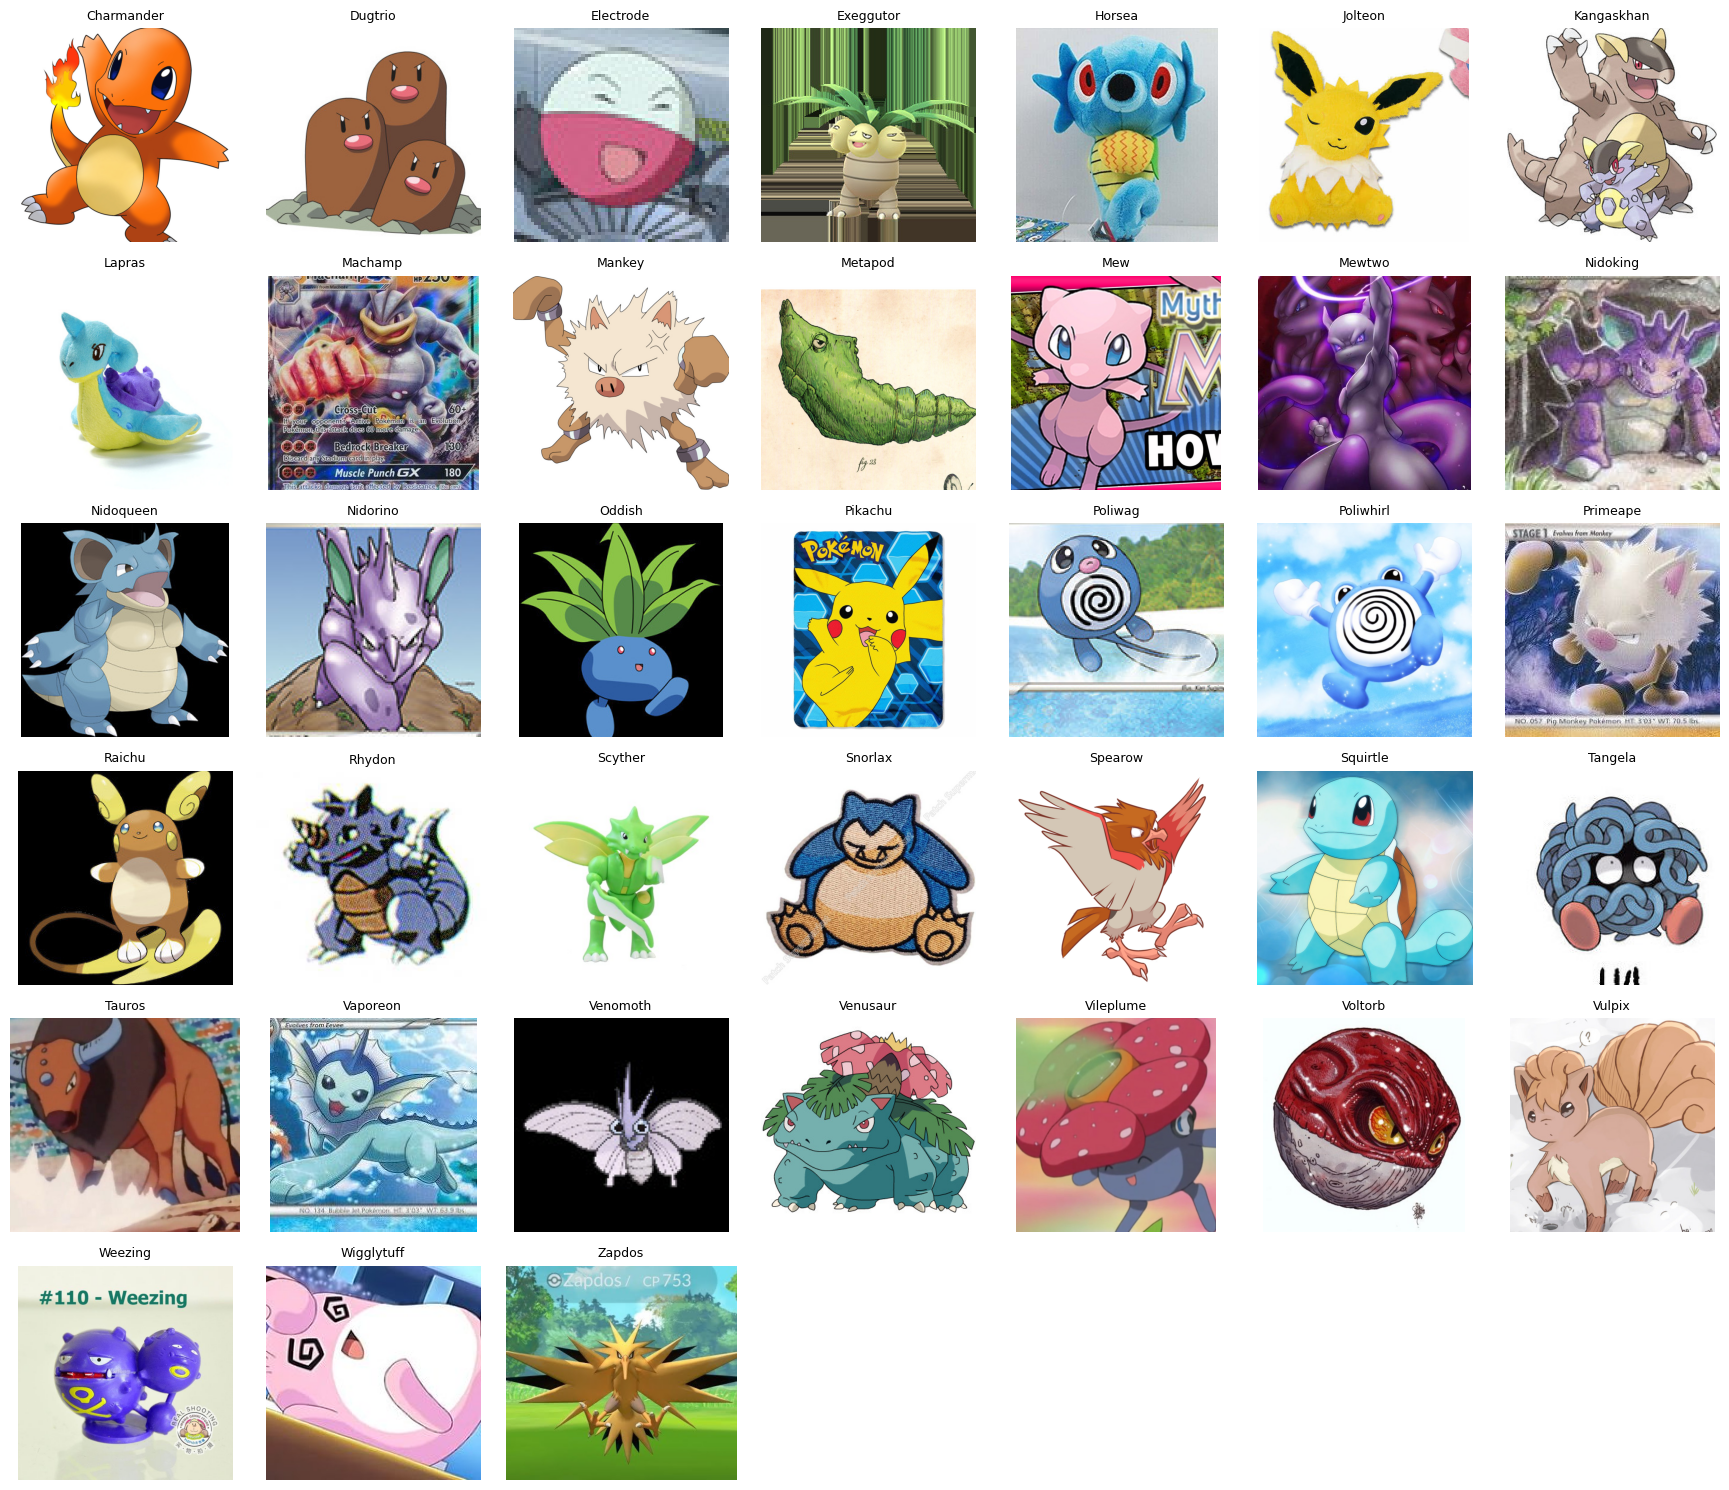

In [8]:
import os
import math
import matplotlib.pyplot as plt
from PIL import Image

# Calculate grid size dynamically
folders = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
folders = sorted(folders)  # Sort alphabetically

n_classes = len(folders)
n_cols = 7  # You can choose a different number of columns
n_rows = math.ceil(n_classes / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2.5))
axs = axs.flatten()

# Plot one image per class
for ax, folder in zip(axs, folders):
    img_path = os.path.join(dataset_path, folder, os.listdir(os.path.join(dataset_path, folder))[0])
    try:
        img = Image.open(img_path)
        ax.imshow(img)
    except Exception as e:
        ax.text(0.5, 0.5, f"Error\n{e}", ha='center', va='center', fontsize=8)
    ax.set_title(folder, fontsize=9)
    ax.axis('off')

# Hide any extra subplots if there are any
for ax in axs[len(folders):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


/var/folders/5h/38lqs7dd2rn8fzv14qzz45dh0000gn/T/ipykernel_1069/1415430215.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pokémon', y='Brightness', data=data, palette="coolwarm")


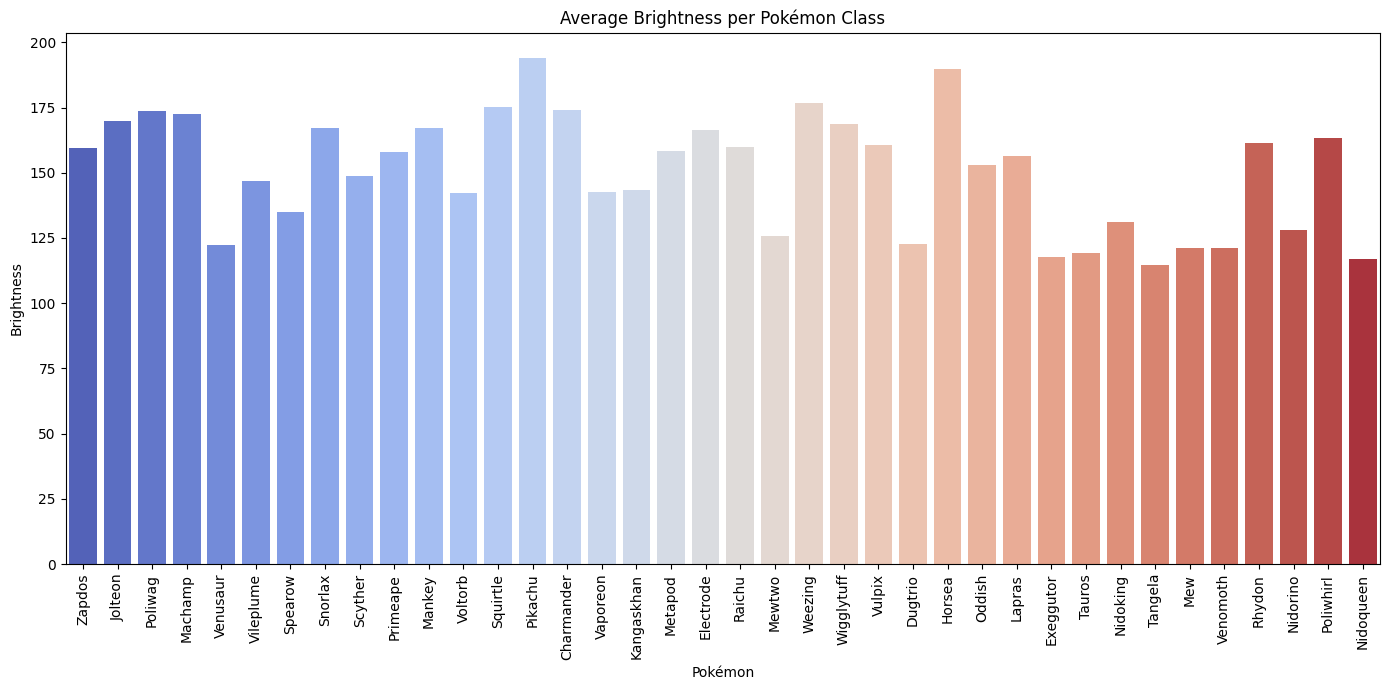

/var/folders/5h/38lqs7dd2rn8fzv14qzz45dh0000gn/T/ipykernel_1069/1415430215.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pokémon', y='Contrast', data=data, palette="coolwarm")


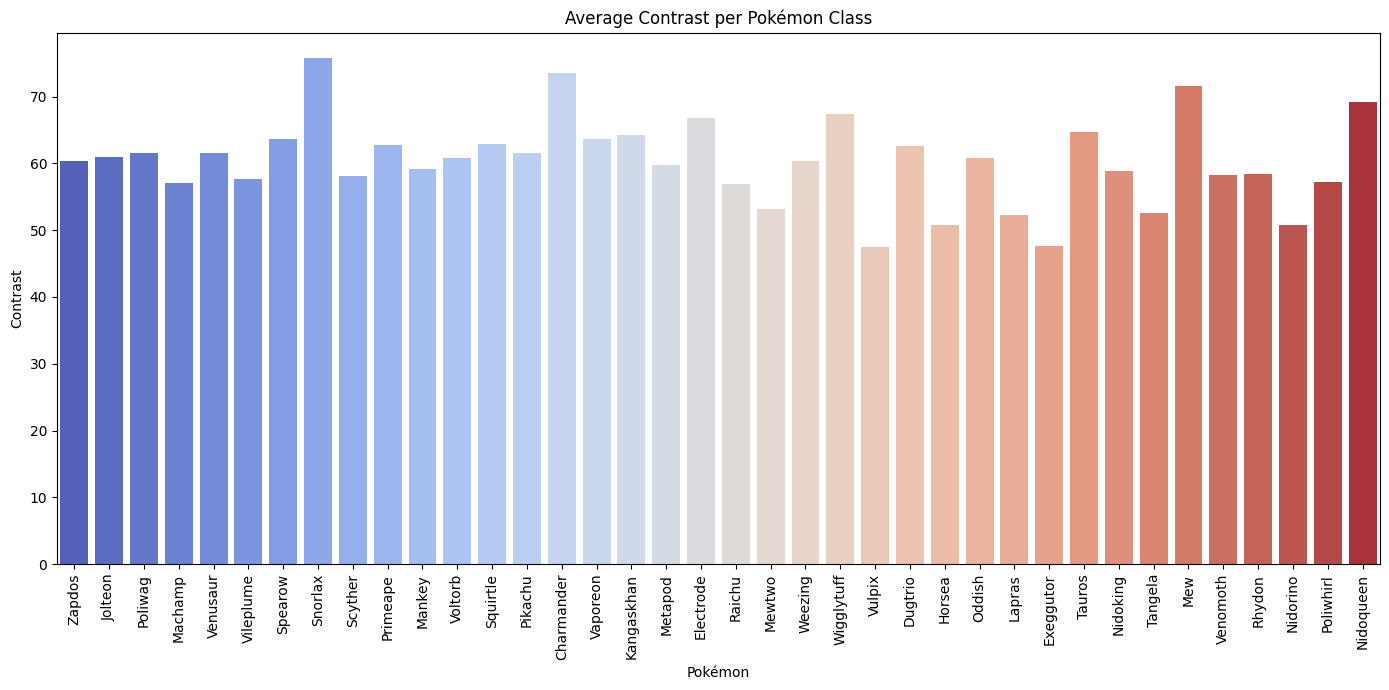

In [9]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

brightness = {}
contrast = {}

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        folder_brightness = []
        folder_contrast = []
        # Use just one image per folder or average over several if available
        for img_name in os.listdir(folder_path)[:5]:
            try:
                img = Image.open(os.path.join(folder_path, img_name)).convert('L')  # grayscale
                img_np = np.array(img)
                folder_brightness.append(np.mean(img_np))
                folder_contrast.append(np.std(img_np))
            except Exception as e:
                print(f"Skipping {img_name} in {folder}: {e}")
        brightness[folder] = np.mean(folder_brightness)
        contrast[folder] = np.mean(folder_contrast)

# Plot brightness
data = pd.DataFrame({'Pokémon': list(brightness.keys()), 'Brightness': list(brightness.values())})
plt.figure(figsize=(14, 7))
sns.barplot(x='Pokémon', y='Brightness', data=data, palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Average Brightness per Pokémon Class')
plt.tight_layout()
plt.show()

# Plot contrast
data = pd.DataFrame({'Pokémon': list(contrast.keys()), 'Contrast': list(contrast.values())})
plt.figure(figsize=(14, 7))
sns.barplot(x='Pokémon', y='Contrast', data=data, palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Average Contrast per Pokémon Class')
plt.tight_layout()
plt.show()


/var/folders/5h/38lqs7dd2rn8fzv14qzz45dh0000gn/T/ipykernel_1069/4182787917.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pokémon', y='File Size (KB)', data=data, palette="viridis")


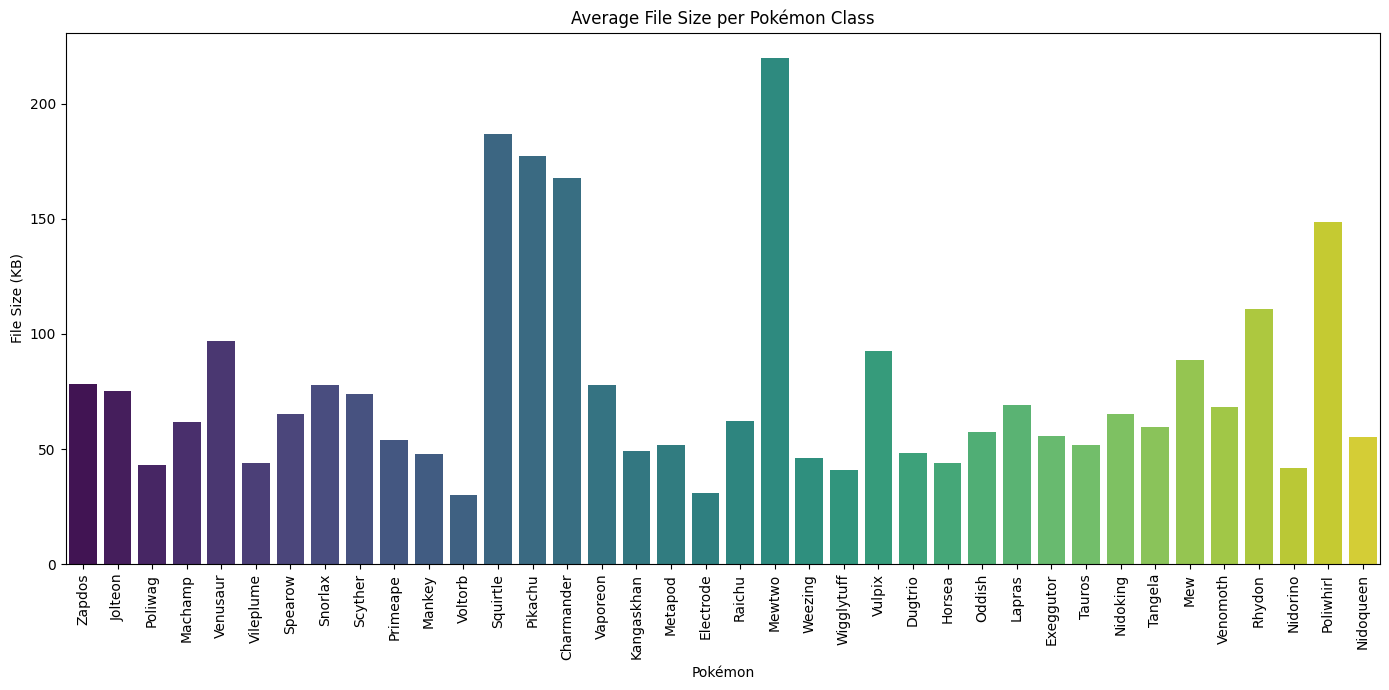

In [10]:
file_sizes = {}
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        sizes = [os.path.getsize(os.path.join(folder_path, img))/1024 for img in os.listdir(folder_path)]
        file_sizes[folder] = np.mean(sizes)

data = pd.DataFrame({'Pokémon': list(file_sizes.keys()), 'File Size (KB)': list(file_sizes.values())})
plt.figure(figsize=(14, 7))
sns.barplot(x='Pokémon', y='File Size (KB)', data=data, palette="viridis")
plt.xticks(rotation=90)
plt.title('Average File Size per Pokémon Class')
plt.tight_layout()
plt.show()


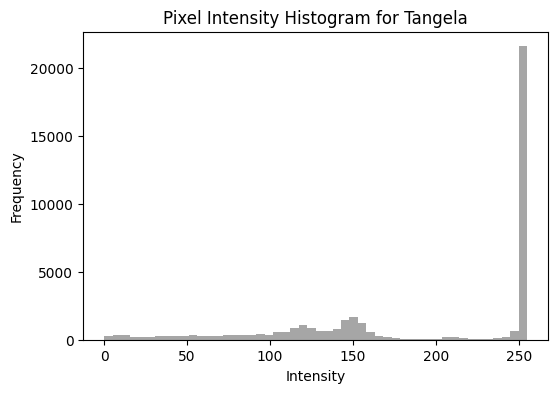

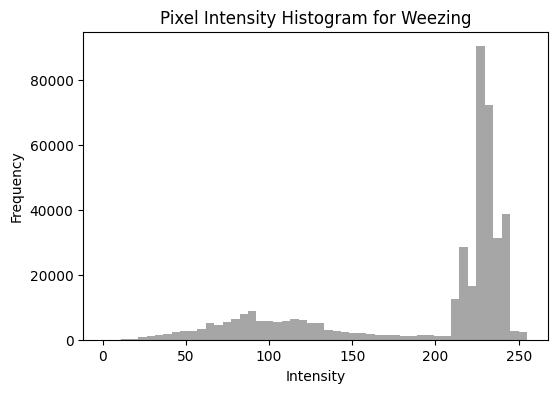

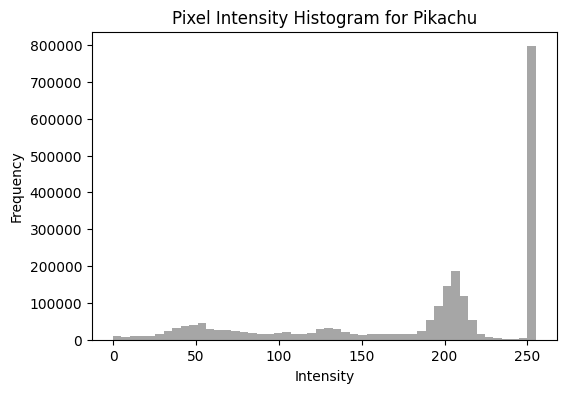

In [11]:
import random

sample_classes = random.sample([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))], 3)
for cls in sample_classes:
    folder = os.path.join(dataset_path, cls)
    img_path = os.path.join(folder, os.listdir(folder)[0])
    img = Image.open(img_path).convert('L')
    img_np = np.array(img)
    
    plt.figure(figsize=(6,4))
    plt.hist(img_np.flatten(), bins=50, color='gray', alpha=0.7)
    plt.title(f'Pixel Intensity Histogram for {cls}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.show()


2025-04-09 17:27:38.512147: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-09 17:27:38.512425: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-09 17:27:38.512443: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-09 17:27:38.512510: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-09 17:27:38.512589: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-04-09 17:27:41.062397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━

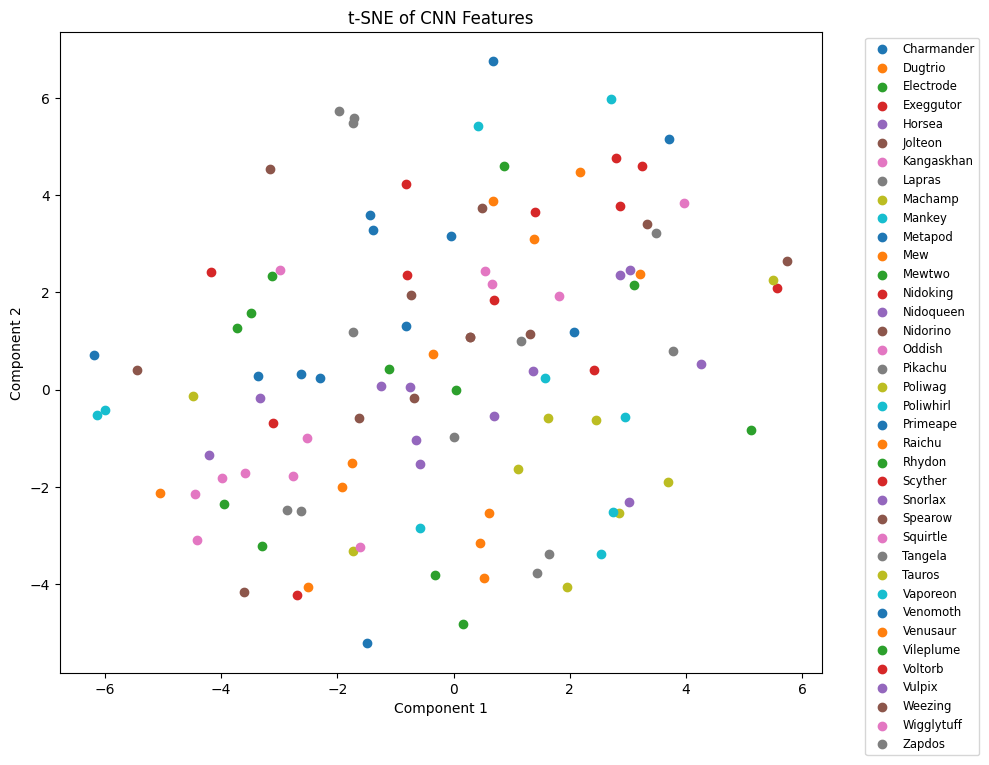

In [12]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.manifold import TSNE
import numpy as np

# Initialize pre-trained model, excluding top layers
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

features = []
labels = []
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        img_files = os.listdir(folder_path)
        # Process a small sample per class
        for img_name in img_files[:3]:
            img_path = os.path.join(folder_path, img_name)
            try:
                img = image.load_img(img_path, target_size=(224, 224))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                feat = model.predict(x)
                features.append(feat.flatten())
                labels.append(folder)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

features = np.array(features)
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)

plt.figure(figsize=(10, 8))
for label in np.unique(labels):
    idxs = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(features_2d[idxs, 0], features_2d[idxs, 1], label=label)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.title('t-SNE of CNN Features')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.tight_layout()
plt.show()


In [90]:
# Create ImageDataGenerators for loading images
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Rescale images to [0, 1]
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,  # Random horizontal flip
    rotation_range=20,  # Random rotations
    shear_range=0.2,  # Shear images
    zoom_range=0.2,  # Zoom images
    vertical_flip=True,
    channel_shift_range=0.2,
    brightness_range=[0.7,1.3],
    fill_mode='nearest'  # Filling mode for new pixels after transformation
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for validation set
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test set

# Create generators from directories
train_dataset = train_datagen.flow_from_directory(
    "/Users/rajendarbore/Desktop/Pokemon Image Data/train",
    target_size=(224, 224),  # Resize images to 224x224 for MobileNetV2
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    shuffle=True
)

val_dataset = val_datagen.flow_from_directory(
     "/Users/rajendarbore/Desktop/Pokemon Image Data/val",
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical' , # For multi-class classification
    shuffle=True
)

test_dataset = test_datagen.flow_from_directory(
    "/Users/rajendarbore/Desktop/Pokemon Image Data/test",
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical' , # For multi-class classification
    shuffle=False
)

Found 1984 images belonging to 38 classes.
Found 1054 images belonging to 38 classes.
Found 672 images belonging to 38 classes.


In [36]:
print("Train classes:", train_dataset.class_indices.keys())
print("Val classes:", val_dataset.class_indices.keys())
print("Test classes:", test_dataset.class_indices.keys())


Train classes: dict_keys(['Charmander', 'Dugtrio', 'Electrode', 'Exeggutor', 'Horsea', 'Jolteon', 'Kangaskhan', 'Lapras', 'Machamp', 'Mankey', 'Metapod', 'Mew', 'Mewtwo', 'Nidoking', 'Nidoqueen', 'Nidorino', 'Oddish', 'Pikachu', 'Poliwag', 'Poliwhirl', 'Primeape', 'Raichu', 'Rhydon', 'Scyther', 'Snorlax', 'Spearow', 'Squirtle', 'Tangela', 'Tauros', 'Vaporeon', 'Venomoth', 'Venusaur', 'Vileplume', 'Voltorb', 'Vulpix', 'Weezing', 'Wigglytuff', 'Zapdos'])
Val classes: dict_keys(['Charmander', 'Dugtrio', 'Electrode', 'Exeggutor', 'Horsea', 'Jolteon', 'Kangaskhan', 'Lapras', 'Machamp', 'Mankey', 'Metapod', 'Mew', 'Mewtwo', 'Nidoking', 'Nidoqueen', 'Nidorino', 'Oddish', 'Pikachu', 'Poliwag', 'Poliwhirl', 'Primeape', 'Raichu', 'Rhydon', 'Scyther', 'Snorlax', 'Spearow', 'Squirtle', 'Tangela', 'Tauros', 'Vaporeon', 'Venomoth', 'Venusaur', 'Vileplume', 'Voltorb', 'Vulpix', 'Weezing', 'Wigglytuff', 'Zapdos'])
Test classes: dict_keys(['Charmander', 'Dugtrio', 'Electrode', 'Exeggutor', 'Horsea', 'J

In [38]:
from PIL import Image
import os

def clean_corrupt_images(directory):
    removed = 0
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if not os.path.isdir(class_path):
            continue
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Check if the image can be read
            except Exception as e:
                print(f"Removing corrupt image: {img_path}")
                os.remove(img_path)
                removed += 1
    print(f"✅ Done. Removed {removed} corrupt images.")

clean_corrupt_images("/Users/rajendarbore/Desktop/Pokemon Image Data/test")


✅ Done. Removed 0 corrupt images.


In [37]:
# This ensures test_dataset.classes is in the correct order
y_true = test_dataset.labels

# Confirm label index mapping is consistent
print(test_dataset.class_indices)


{'Charmander': 0, 'Dugtrio': 1, 'Electrode': 2, 'Exeggutor': 3, 'Horsea': 4, 'Jolteon': 5, 'Kangaskhan': 6, 'Lapras': 7, 'Machamp': 8, 'Mankey': 9, 'Metapod': 10, 'Mew': 11, 'Mewtwo': 12, 'Nidoking': 13, 'Nidoqueen': 14, 'Nidorino': 15, 'Oddish': 16, 'Pikachu': 17, 'Poliwag': 18, 'Poliwhirl': 19, 'Primeape': 20, 'Raichu': 21, 'Rhydon': 22, 'Scyther': 23, 'Snorlax': 24, 'Spearow': 25, 'Squirtle': 26, 'Tangela': 27, 'Tauros': 28, 'Vaporeon': 29, 'Venomoth': 30, 'Venusaur': 31, 'Vileplume': 32, 'Voltorb': 33, 'Vulpix': 34, 'Weezing': 35, 'Wigglytuff': 36, 'Zapdos': 37}


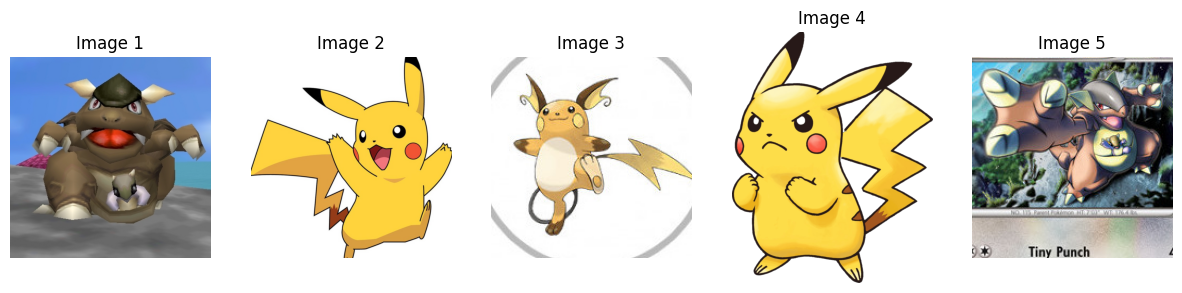

In [15]:
# Collect all Pokémon subfolders
pokemon_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Get a list of all images from all Pokémon folders
all_images = []
for folder in pokemon_folders:
    folder_path = os.path.join(dataset_path, folder)
    images = os.listdir(folder_path)
    for image in images:
        all_images.append(os.path.join(folder_path, image))

# Select 5 random images
random_images = random.sample(all_images, 5)

# Plot the images
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(random_images, start=1):
    img = Image.open(image_path)  # Open image
    plt.subplot(1, 5, i)  # Plot in a 1-row, 5-column grid
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Image {i}")

plt.show()


In [7]:
# Load the MobileNetV2 model (pre-trained)
base_model_V2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze most of the layers, but keep the last 40 trainable
base_model_V2.trainable = True
fine_tune_at = len(base_model_V2.layers) - 40  # Unfreeze last 40 layers
for layer in base_model_V2.layers[:fine_tune_at]:
    layer.trainable = False

# Define the model
model = models.Sequential([
    base_model_V2,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Additional Dense Layer
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')  
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Define early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("MobileNetV2.keras", monitor="val_loss", save_best_only=True)
tensorboard_callback = TensorBoard(log_dir="logs", histogram_freq=1)




2025-04-10 12:05:15.122387: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-10 12:05:15.122582: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-10 12:05:15.122607: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-10 12:05:15.123219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-10 12:05:15.123654: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,054,950 (11.65 MB)

 Trainable params: 2,478,502 (9.45 MB)

 Non-trainable params: 576,448 (2.20 MB)

In [17]:
 # Train the model
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, model_checkpoint, tensorboard_callback],
)

# Save the model
model.save("MobileNetV2.keras")
# Save the training history
with open('MobileNetv2.pkl', 'wb') as f:
    pickle.dump(history.history, f)

/Users/rajendarbore/Desktop/Pokemon Image Data/pikachuVenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.0325 - loss: 6.5182 - val_accuracy: 0.1252 - val_loss: 4.5219
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 56s 898ms/step - accuracy: 0.0948 - loss: 5.7191 - val_accuracy: 0.2429 - val_loss: 3.8816
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.1467 - loss: 5.1466 - val_accuracy: 0.3824 - val_loss: 3.3509
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 915ms/step - accuracy: 0.2007 - loss: 4.6601 - val_accuracy: 0.4829 - val_loss: 2.8914
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 54s 875ms/step - accuracy: 0.3123 - loss: 4.0988 - val_accuracy: 0.5465 - val_loss: 2.6457
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 54s 858ms/step - accuracy: 0.3740 - loss: 3.7522 - val_accuracy: 0.6281 - val_loss: 2.2972
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 53s 843ms/step - accuracy: 0.4233 - loss: 3.4163 - val_accuracy: 0.6452 - val_loss: 2.2259
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 54s 857ms/step - accuracy: 0.5155 - loss: 2.8795 - val_accuracy: 

In [26]:
with open('MobileNetV2.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history


{'accuracy': [0.04385080561041832,
  0.0932459682226181,
  0.15927419066429138,
  0.2182459682226181,
  0.3155241906642914,
  0.375,
  0.4490927457809448,
  0.5176411271095276,
  0.5745967626571655,
  0.6159273982048035,
  0.6854838728904724,
  0.6970766186714172,
  0.7308467626571655,
  0.7626007795333862,
  0.7983871102333069,
  0.8130040168762207,
  0.8276209831237793,
  0.8371976017951965,
  0.8639112710952759,
  0.8684476017951965,
  0.8744959831237793,
  0.8891128897666931,
  0.9012096524238586,
  0.9077621102333069,
  0.9097782373428345,
  0.921875,
  0.9138104915618896,
  0.9223790168762207,
  0.9359878897666931,
  0.9405242204666138,
  0.9420362710952759,
  0.9364919066429138,
  0.9420362710952759,
  0.9501007795333862,
  0.9526209831237793,
  0.9415322542190552,
  0.9495967626571655,
  0.961693525314331,
  0.9591733813285828,
  0.9682459831237793,
  0.9586693644523621,
  0.961693525314331,
  0.9667338728904724,
  0.9621976017951965,
  0.9621976017951965,
  0.96875,
  0.971270

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for rescaling images
datagen = ImageDataGenerator(rescale=1./255)

# Create the validation generator
val_generator = datagen.flow_from_directory(
'/Users/rajendarbore/Desktop/Pokemon Image Data/val',
    target_size=(150, 150),  # Adjust this based on your image size
    batch_size=32,           # Adjust this based on your batch size
    class_mode='categorical' # Use 'binary' for binary classification
)

# Create the test generator
test_generator = datagen.flow_from_directory(
    '/Users/rajendarbore/Desktop/Pokemon Image Data/test',  # Replace with the actual path to your test dataset
    target_size=(150, 150),  # Adjust this based on your image size
    batch_size=32,           # Adjust this based on your batch size
    class_mode='categorical' # Use 'binary' for binary classification
)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator, steps=val_generator.samples // val_generator.batch_size)

# Print the validation accuracy
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 1054 images belonging to 38 classes.
Found 672 images belonging to 38 classes.


/Users/rajendarbore/Desktop/Pokemon Image Data/pikachuVenv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.0283 - loss: 7.3661
Validation Accuracy: 3.42%
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.0209 - loss: 7.3169
Test Accuracy: 2.23%


In [99]:
from collections import Counter

def count_images_in_folder(folder):
    counts = Counter()
    for cls in os.listdir(folder):
        cls_path = os.path.join(folder, cls)
        if os.path.isdir(cls_path):
            counts[cls] = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png','.jpg','.jpeg'))])
    return counts

test_distribution = count_images_in_folder('/Users/rajendarbore/Desktop/Pokemon Image Data/test')
print("Test set distribution:", test_distribution)


Test set distribution: Counter({'Venusaur': 26, 'Zapdos': 25, 'Snorlax': 24, 'Mankey': 23, 'Jolteon': 22, 'Scyther': 22, 'Poliwag': 21, 'Vileplume': 20, 'Pikachu': 20, 'Mew': 20, 'Machamp': 19, 'Spearow': 19, 'Horsea': 19, 'Vaporeon': 18, 'Tauros': 18, 'Voltorb': 17, 'Wigglytuff': 17, 'Lapras': 17, 'Tangela': 17, 'Nidoqueen': 17, 'Charmander': 16, 'Kangaskhan': 16, 'Electrode': 16, 'Raichu': 16, 'Dugtrio': 16, 'Oddish': 16, 'Primeape': 15, 'Squirtle': 15, 'Metapod': 15, 'Mewtwo': 15, 'Exeggutor': 15, 'Nidoking': 15, 'Nidorino': 15, 'Weezing': 14, 'Vulpix': 14, 'Venomoth': 14, 'Rhydon': 14, 'Poliwhirl': 14})


In [102]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step - accuracy: 0.0502 - loss: 7.2465
Validation Accuracy: 3.51%
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - accuracy: 0.0305 - loss: 6.6850
Test Accuracy: 2.23%


In [100]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for rescaling images (no augmentation for test)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/Users/rajendarbore/Desktop/Pokemon Image Data/test',
    target_size=(150, 150),  # Make sure this is consistent with training/val
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for test evaluation
)


Found 672 images belonging to 38 classes.


In [101]:
# Evaluate the model on the test data without manually setting steps
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.0305 - loss: 6.6850
Test Accuracy: 2.23%


In [27]:
x_batch, y_batch = next(train_dataset)
y_pred = model.predict(x_batch)
print("Predicted:", tf.argmax(y_pred, axis=1).numpy())
print("Actual:", tf.argmax(y_batch, axis=1).numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
Predicted: [31 11  2 11  0 11 33 20 37  0  7 22 19 32 33  0 19 11 11 33 20 20  0 31
  1  2 11 19  4 11 11 33]
Actual: [35 17 24  7 33 11 14 27 37 15 27  6 12 24 29 15 30 31 25  9 24 29 22 34
  6 27 16 31 31  4 21 23]


In [42]:
print("Train shape:", train_dataset[0][0].shape)
print("Val shape:", val_dataset[0][0].shape)
print("Test shape:", test_dataset[0][0].shape)


Train shape: (32, 224, 224, 3)
Val shape: (32, 224, 224, 3)
Test shape: (32, 224, 224, 3)


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get true labels
y_true = val_dataset.classes  # Extract true labels

# Get predicted labels
y_pred = model.predict(val_dataset, verbose=0)  # No progress bar for speed
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Choose a colorblind-friendly colormap
color_map = "cividis"  # Alternatives: 'viridis', 'magma', 'crest', 'flare'

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='viridis', linewidths=0.5,
            xticklabels=val_dataset.class_indices.keys(),
            yticklabels=val_dataset.class_indices.keys(),
            annot_kws={"size": 10})  # Show numbers inside, no bold

# Labels & Title
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)

# Show plot
plt.show()


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get true labels
y_true = val_dataset.classes

# Get predicted labels
y_pred = model.predict(val_dataset, verbose=0)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=val_dataset.class_indices.keys(),
            yticklabels=val_dataset.class_indices.keys(),
            linewidths=0.5, linecolor='gray', cbar=True, annot_kws={"size": 10})

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet import preprocess_input

# Image dimensions
img_height, img_width = 224, 224
batch_size = 64  # Increased batch size
num_classes = 38

# Data Augmentation for Training Dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Horizontally shift images by 20%
    height_shift_range=0.2,  # Vertically shift images by 20%
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Random zooming
    channel_shift_range=0.2,  # Small color shifts
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,
    brightness_range=[0.7, 1.3],  # Adjust brightness randomly
    fill_mode='nearest',  # Fill missing pixels after transformations
    preprocessing_function=preprocess_input  # Apply EfficientNetB0 preprocessing
)

# Ensure data augmentation is appropriate
train_dataset = train_datagen.flow_from_directory(
    "train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Data Preprocessing for Validation & Test Datasets (No augmentation, just rescaling)
val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input  # Apply EfficientNetB0 preprocessing
)

val_dataset = val_test_datagen.flow_from_directory(
    "val",
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_dataset = val_test_datagen.flow_from_directory(
    "test",
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load EfficientNetB0 model pre-trained on ImageNet
base_model_B0 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Freeze all layers of the base model
base_model_B0.trainable = False

# Fine-Tuning: Unfreeze top layers for additional training
fine_tune_at_B0 = len(base_model_B0.layers) - 60
base_model_B0.trainable = True

for layer in base_model_B0.layers[:fine_tune_at_B0]:
    layer.trainable = False  # Keep initial layers frozen
for layer in base_model_B0.layers[fine_tune_at_B0:]:
    layer.trainable = True  # Fine-tune last 60 layers


# Create custom classification head
model_B0 = tf.keras.Sequential([
    base_model_B0,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 38 classes for Pokémon
])


# Compile the model
model_B0.compile(
    optimizer=Adam(learning_rate=0.00005),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping
early_stopping_B0 = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model with fine-tuning
history_B0 = model_B0.fit(
    train_dataset,
    epochs=45,
    validation_data=val_dataset,
    callbacks=[early_stopping_B0]
)

# Save the trained model
model_B0.save("EfficientNetB0_final.h5")
model_B0.save("EfficientNetB0_final.keras")

# Save training history
with open('EfficientNetB0_history.pkl', 'wb') as f:
    pickle.dump(history_B0.history, f)


In [ ]:
import tensorflow as tf
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.efficientnet import preprocess_input

# Image dimensions
img_height, img_width = 224, 224
batch_size = 64  # Increased batch size
num_classes = 38

# Data Augmentation for Training Dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Horizontally shift images by 20%
    height_shift_range=0.2,  # Vertically shift images by 20%
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Random zooming
    channel_shift_range=0.2,  # Small color shifts
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,
    brightness_range=[0.7, 1.3],  # Adjust brightness randomly
    fill_mode='nearest',  # Fill missing pixels after transformations
    preprocessing_function=preprocess_input  # Apply EfficientNetB0 preprocessing
)

# Ensure data augmentation is appropriate
train_dataset = train_datagen.flow_from_directory(
    "train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Data Preprocessing for Validation & Test Datasets (No augmentation, just rescaling)
val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input  # Apply EfficientNetB0 preprocessing
)

val_dataset = val_test_datagen.flow_from_directory(
    "val",
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_dataset = val_test_datagen.flow_from_directory(
    "test",
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load EfficientNetB0 model pre-trained on ImageNet
base_model_B0 = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)

# Freeze all layers of the base model
base_model_B0.trainable = False

# Fine-Tuning: Unfreeze top layers for additional training
fine_tune_at_B0 = len(base_model_B0.layers) - 60
base_model_B0.trainable = True

for layer in base_model_B0.layers[:fine_tune_at_B0]:
    layer.trainable = False  # Keep initial layers frozen
for layer in base_model_B0.layers[fine_tune_at_B0:]:
    layer.trainable = True  # Fine-tune last 60 layers


# Create custom classification head
model_B0 = tf.keras.Sequential([
    base_model_B0,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 38 classes for Pokémon
])


# Compile the model
model_B0.compile(
    optimizer=Adam(learning_rate=0.00005),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping
early_stopping_B0 = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Define Learning Rate Scheduler (ReduceLROnPlateau)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,  # Reduce learning rate by a factor of 0.5
    patience=2,  # Wait for 2 epochs with no improvement in validation loss
    min_lr=1e-7,  # Minimum learning rate (you can adjust this)
    verbose=1  # Print a message when the learning rate is reduced
)

# Train the model with fine-tuning and learning rate scheduler
history_B0 = model_B0.fit(
    train_dataset,
    epochs=45,
    validation_data=val_dataset,
    callbacks=[early_stopping_B0, lr_scheduler]  # Add the scheduler here
)

# Save the trained model
model_B0.save("EfficientNetB0_final.h5")
model_B0.save("EfficientNetB0_final.keras")

# Save training history
with open('EfficientNetB0_history.pkl', 'wb') as f:
    pickle.dump(history_B0.history, f)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf

# Assuming you have loaded your EfficientNetB0 model (already compiled and trained)
# And your validation dataset is `val_dataset`

# Get true labels from the validation dataset (ensure the dataset is correctly preprocessed)
y_true = val_dataset.classes  # For validation set

# Predict the labels on the validation dataset
y_pred = model_B0.predict(val_dataset, steps=len(val_dataset))  # Ensure `steps` covers the full dataset

# Convert probabilities to class labels (index with the highest probability)
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_labels)

# Print the classification report
print(report)


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get true labels
y_true = val_dataset.classes

# Get predicted labels
y_pred = model_B0.predict(val_dataset, verbose=0)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=val_dataset.class_indices.keys(),
            yticklabels=val_dataset.class_indices.keys(),
            linewidths=0.5, linecolor='gray', cbar=True, annot_kws={"size": 10})

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

# Function to plot true vs predicted labels with images
def plot_true_vs_predicted(model, dataset, num_images=5):
    # List to store selected images, true labels, and predicted labels
    selected_images = []
    selected_true_labels = []
    selected_predicted_labels = []

    # Get class names from the dataset
    class_names = list(dataset.class_indices.keys())

    # Set to track unique Pokémon classes for selection
    unique_pokemon = set()

    # Counter for how many unique images we've selected
    selected_count = 0

    # Iterate over the dataset and collect images
    for images, true_labels in dataset:
        if selected_count >= num_images:
            break

        # Iterate over each image in the batch
        for i in range(len(images)):
            # Check the class of the current image
            pokemon_class = np.argmax(true_labels[i])  # Find the index of the class

            # Skip if we've already selected this Pokémon class
            if pokemon_class not in unique_pokemon:
                unique_pokemon.add(pokemon_class)

                # Append the image, true label, and predicted label to the lists
                selected_images.append(images[i])
                selected_true_labels.append(np.argmax(true_labels[i]))  # Convert to integer class index

                # Make a prediction for the image
                prediction = model.predict(np.expand_dims(images[i], axis=0))  # Add batch dimension
                predicted_label = np.argmax(prediction, axis=1)[0]  # Get the predicted class label
                selected_predicted_labels.append(predicted_label)

                selected_count += 1

                # If we've already selected enough images, stop processing
                if selected_count >= num_images:
                    break

    # Plot the images with true vs predicted labels
    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)

        # Rescale the image to [0, 1] to match the range expected by plt.imshow()
        image = selected_images[i]

        # If images are in the range [0, 255], divide by 255.0
        if image.max() > 1.0:
            image = image / 255.0

        # Display the image
        plt.imshow(image)

        true_label = class_names[selected_true_labels[i]]  # Get the true label (now integer index)
        predicted_label = class_names[selected_predicted_labels[i]]  # Get the predicted label
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=12)
        plt.axis("off")  # Hide axis

    plt.show()

# Call the function with your model and dataset
plot_true_vs_predicted(model_B0, val_dataset, num_images=5)  # Adjust dataset and num_images as needed


In [ ]:
import tensorflow as tf
import pickle
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


# Image dimensions
img_height, img_width = 224, 224
batch_size = 64  # Increased batch size
num_classes = 38

# Data Augmentation for Training Dataset
train_datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.2, zoom_range=0.2, channel_shift_range=0.2,
    horizontal_flip=True, vertical_flip=True, brightness_range=[0.7, 1.3],
    fill_mode='nearest', preprocessing_function=preprocess_input
)

train_dataset = train_datagen.flow_from_directory(
    "train", target_size=(img_height, img_width), batch_size=batch_size,
    class_mode='categorical', shuffle=True
)

# Data Preprocessing for Validation & Test Datasets
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_dataset = val_test_datagen.flow_from_directory(
    "val", target_size=(img_height, img_width), batch_size=32,
    class_mode='categorical', shuffle=False
)
test_dataset = val_test_datagen.flow_from_directory(
    "test", target_size=(img_height, img_width), batch_size=32,
    class_mode='categorical', shuffle=False
)

# Load ResNet50 model pre-trained on ImageNet
base_model_ResNet50 = ResNet50(
    include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3)
)

# Freeze all layers of the base model
base_model_ResNet50.trainable = False

# Fine-Tuning: Unfreeze top layers for additional training
fine_tune_at_ResNet50 = len(base_model_ResNet50.layers) - 60
base_model_ResNet50.trainable = True
for layer in base_model_ResNet50.layers[:fine_tune_at_ResNet50]:
    layer.trainable = False  # Keep initial layers frozen
for layer in base_model_ResNet50.layers[fine_tune_at_ResNet50:]:
    layer.trainable = True  # Fine-tune last 60 layers

# Create custom classification head
model_ResNet50 = tf.keras.Sequential([
    base_model_ResNet50,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model_ResNet50.compile(
    optimizer=Adam(learning_rate=0.00005),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping, ModelCheckpoint & Learning Rate Scheduler
early_stopping_ResNet50 = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint_ResNet50 = ModelCheckpoint("best_ResNet50_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-7, verbose=1)

# Train the model with fine-tuning
history_ResNet50 = model_ResNet50.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset,
    callbacks=[early_stopping_ResNet50, checkpoint_ResNet50, lr_scheduler]
)

# Save the final trained model
model_ResNet50.save("ResNet50_final.h5")
model_ResNet50.save("ResNet50_final.keras")

# Save training history
with open('ResNet50_history.pkl', 'wb') as f:
    pickle.dump(history_ResNet50.history, f)


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf

# Assuming you have loaded your EfficientNetB0 model (already compiled and trained)
# And your validation dataset is `val_dataset`

# Get true labels from the validation dataset (ensure the dataset is correctly preprocessed)
y_true = val_dataset.classes  # For validation set

# Predict the labels on the validation dataset
y_pred = model_ResNet50.predict(val_dataset, steps=len(val_dataset))  # Ensure `steps` covers the full dataset

# Convert probabilities to class labels (index with the highest probability)
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate the classification report
report = classification_report(y_true, y_pred_labels)

# Print the classification report
print(report)


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get true labels
y_true = val_dataset.classes

# Get predicted labels
y_pred = model_ResNet50.predict(val_dataset, verbose=0)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=val_dataset.class_indices.keys(),
            yticklabels=val_dataset.class_indices.keys(),
            linewidths=0.5, linecolor='gray', cbar=True, annot_kws={"size": 10})

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array

# Function to plot true vs predicted labels with images
def plot_true_vs_predicted(model, dataset, num_images=5):
    # List to store selected images, true labels, and predicted labels
    selected_images = []
    selected_true_labels = []
    selected_predicted_labels = []

    # Get class names from the dataset
    class_names = list(dataset.class_indices.keys())

    # Set to track unique Pokémon classes for selection
    unique_pokemon = set()

    # Counter for how many unique images we've selected
    selected_count = 0

    # Iterate over the dataset and collect images
    for images, true_labels in dataset:
        if selected_count >= num_images:
            break

        # Iterate over each image in the batch
        for i in range(len(images)):
            # Check the class of the current image
            pokemon_class = np.argmax(true_labels[i])  # Find the index of the class

            # Skip if we've already selected this Pokémon class
            if pokemon_class not in unique_pokemon:
                unique_pokemon.add(pokemon_class)

                # Append the image, true label, and predicted label to the lists
                selected_images.append(images[i])
                selected_true_labels.append(np.argmax(true_labels[i]))  # Convert to integer class index

                # Make a prediction for the image
                prediction = model.predict(np.expand_dims(images[i], axis=0))  # Add batch dimension
                predicted_label = np.argmax(prediction, axis=1)[0]  # Get the predicted class label
                selected_predicted_labels.append(predicted_label)

                selected_count += 1

                # If we've already selected enough images, stop processing
                if selected_count >= num_images:
                    break

    # Plot the images with true vs predicted labels
    plt.figure(figsize=(15, 15))

    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)

        # Rescale the image to [0, 1] to match the range expected by plt.imshow()
        image = selected_images[i]

        # If images are in the range [0, 255], divide by 255.0
        if image.max() > 1.0:
            image = image / 255.0

        # Display the image
        plt.imshow(image)

        true_label = class_names[selected_true_labels[i]]  # Get the true label (now integer index)
        predicted_label = class_names[selected_predicted_labels[i]]  # Get the predicted label
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=12)
        plt.axis("off")  # Hide axis

    plt.show()

# Call the function with your model and dataset
plot_true_vs_predicted(model_ResNet50, val_dataset, num_images=5)  # Adjust dataset and num_images as needed
